In [ ]:
base_dir = 'yelp_dataset' #set your base directory here

In [ ]:
import pandas as pd
import numpy as np
business_json_path = f'{base_dir}/yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)


In [2]:
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [4]:
num = 0
i = 0
drop_index = []
for index, row in df_b.iterrows():
    if row["categories"] is not None:
        if ("Restaurants" in (row["categories"]) or "Food" in (row["categories"])) and row["is_open"] == 1 and row["review_count"] >= 15 and row["state"] == "PA":
            num+=1
        else:
            drop_index.append(index)
    else:
        drop_index.append(index)
num

7314

In [5]:
df_b.drop(drop_index, axis=0, inplace=True)
len(df_b)
print(np.sum(list(df_b["review_count"])))


846075


In [7]:
business_lookup = {n: True for n in list(df_b["business_id"])}

In [8]:
import json
import pandas as pd
data_file = open(f"{base_dir}/yelp_academic_dataset_review.json", encoding='utf-8')
cutoffs = []
for i in range(int(7000000/500000)+1):
    cutoffs.append(i*500000)

In [9]:
for j in range(len(cutoffs)-1):
    data = []
    data_file = open(f"{base_dir}/yelp_academic_dataset_review.json", encoding='utf-8')
    for i, line in enumerate(data_file):
        if i >= cutoffs[j] and i < cutoffs[j+1]:
            data.append(json.loads(line))
        if i > cutoffs[j+1]:
            print("broken")
            break
    df = pd.DataFrame(data)
    data_file.close()
    index_to_remove = []
    for index, row in df.iterrows():
        if row["business_id"] not in business_lookup:
            index_to_remove.append(index)
    df.drop(index_to_remove, axis=0, inplace=True)
    curr_df = pd.DataFrame(df)
    curr_df.to_csv(f'{base_dir}/PA_reviews/reviews_' + str(j) + ".csv", index=False)


broken
broken
broken
broken
broken
broken
broken
broken
broken
broken
broken
broken
broken


In [21]:
import os
import numpy as np

folder_path = f'{base_dir}/PA_reviews'
user_set = np.array([])
review_counter = 0

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        review_counter += len(df)
        user_list = np.array(df["user_id"])
        user_set = np.concatenate((user_set, user_list))

print(user_set.shape)

(877333,)


In [22]:
user_set = set(list(user_set)) #1309910
print(len(user_set))
review_counter #3990304

275128


877333

In [23]:
user_lookup = {n: True for n in list(user_set)}
len(user_lookup)

275128

In [24]:
cutoffs = []
for i in range(int(2000000/500000)+1):
    cutoffs.append(i*500000)

In [25]:
r_counter=0

for j in range(len(cutoffs)-1):
    data = []
    data_file = open(f"{base_dir}/yelp_academic_dataset_user.json", encoding='utf-8')
    for i, line in enumerate(data_file):
        if i >= cutoffs[j] and i < cutoffs[j+1]:
            data.append(json.loads(line))
        if i > cutoffs[j+1]:
            print("broken")
            break
    df = pd.DataFrame(data)
    data_file.close()
    index_to_remove = []
    for index, row in df.iterrows():
        if row["user_id"] not in user_lookup:
            r_counter +=1
            index_to_remove.append(index)
    df.drop(index_to_remove, axis=0, inplace=True)
    curr_df = pd.DataFrame(df)
    curr_df.to_csv(f'{base_dir}/PA_users/users_' + str(j) + ".csv", index=False)
r_counter

broken
broken
broken


1712770

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

In [27]:
sentence = "test"
sentiment_dict = sid_obj.polarity_scores(sentence)
print(sentiment_dict)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [28]:
import os
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
folder_path = f'{base_dir}}/PA_reviews/'
k = 0
sid = SentimentIntensityAnalyzer()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        df['score'] = df['text'].apply(lambda txt: sid.polarity_scores(txt))
        df['negative'] = df['score'].apply(lambda txt: txt['neg'])
        df['neutral'] = df['score'].apply(lambda txt: txt['neu'])
        df['positive'] = df['score'].apply(lambda txt: txt['pos'])
        df['compound'] = df['score'].apply(lambda txt: txt['compound'])
        curr_df = pd.DataFrame(df)
        k += 1
        curr_df.to_csv(f'{base_dir}/vader/PA_vader' + str(k) + ".csv", index=False)
        print(k)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [51]:
import os
import numpy as np
import pandas as pd

users_dict = {}
stars_sum = 0
stars = None
folder_path = f'{base_dir}}/PA_reviews/'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        if stars is None:
            stars = list(df["stars"])
        else:
            stars.extend(list(df["stars"]))
        stars_sum += df['stars'].sum()
        for user_id in df["user_id"]:
            if user_id in users_dict:
                users_dict[user_id] += 1
            else:
                users_dict[user_id] = 1

1.3608686653007593

In [52]:
std_dev = np.std(stars)
std_dev

1.3608686653007593

In [2]:
users_to_remove = []
for id, value in users_dict.items():
    if value <= 2:
        users_to_remove.append(id)
len(users_to_remove)

206541

In [47]:
count=0
sum = 0
for id, value in users_dict.items():
    count+=1
    sum+=value

sum/count

3.1888175685499114

In [46]:
stars_sum/sum

3.7993202125076797

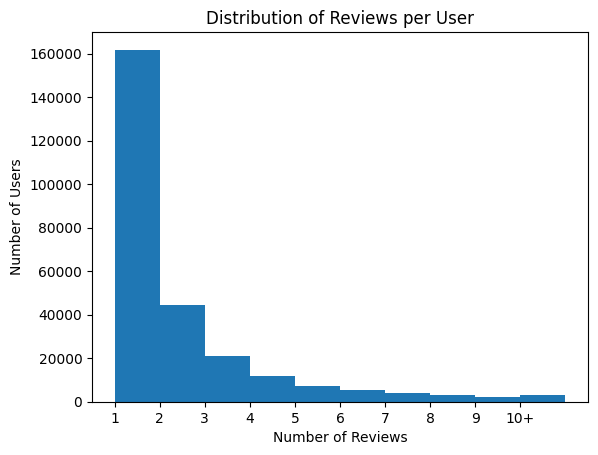

In [17]:
import matplotlib.pyplot as plt

review_counts = users_dict.values()
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.hist(review_counts, bins=bins)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')

plt.xticks(bins[:-1])
bin_labels = [f'{bins[i]}' for i in range(len(bins)-1)]
bin_labels[-1] = '10+'
plt.xticks(bins[:-1], bin_labels)

# Display the plot
plt.show()

In [4]:
users_to_keep = []
for id, value in users_dict.items():
    if value > 2:
        users_to_keep.append(id)
len(users_to_keep)

68587

In [36]:
import os
import pandas as pd

final_df = None
folder_path = f'{base_dir}/PA_vader/'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        df = df[~df["user_id"].isin(users_to_remove)]
        if final_df is None:
            final_df = df
        else:
            final_df = pd.concat([final_df, df], axis=0)
        
final_df.to_csv(f"{base_dir}/cleaned_data/reviews.csv", index=False)

In [37]:
print(len(final_df))

626103


In [86]:
users_dict = {}
stars = None
sentiment = None
folder_path = f"{base_dir}/cleaned_data/reviews.csv"
df = pd.read_csv(folder_path)
print(df.shape)
if stars is None:
    stars = list(df["stars"])
else:
    stars.extend(list(df["stars"]))
if sentiment is None:
    sentiment = list(df["compound"])
else:
    sentiment.extend(list(df["compound"]))
for user_id in df["user_id"]:
    if user_id in users_dict:
        users_dict[user_id] += 1
    else:
        users_dict[user_id] = 1

(626103, 14)


In [75]:
count=0
sum = 0
for id, value in users_dict.items():
    count+=1
    sum+=value

sum/count

9.128595798037528

In [88]:
std_dev = np.std(sentiment)
print(std_dev)
mean = np.mean(sentiment)
mean

0.4826658839831325


0.7173455872276603

In [87]:
std_dev = np.std(stars)
print(std_dev)
mean = np.mean(stars)
mean

1.257508951167413


3.8479483407682125

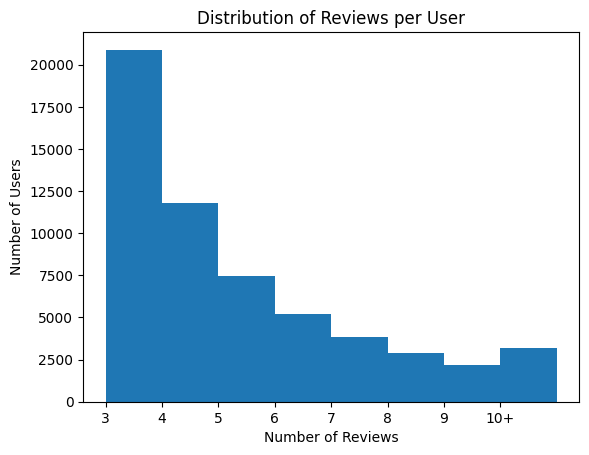

In [83]:
import matplotlib.pyplot as plt

review_counts = users_dict.values()
bins = [3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.hist(review_counts, bins=bins)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Reviews per User')

plt.xticks(bins[:-1])
bin_labels = ['3', '4', '5', '6', '7', '8', '9', '10+']
plt.xticks(bins[:-1], bin_labels)

# Display the plot
plt.show()

In [76]:
print(sum)

626103


In [40]:
#import os
#import pandas as pd
#k = 0
#final_df = None
#folder_path = 'D:/FlavorFriend/yelp_dataset/PA_users/'

#for filename in os.listdir(folder_path):
    #file_path = os.path.join(folder_path, filename)
    #if os.path.isfile(file_path):
        #k+=1
        #df = pd.read_csv(file_path)
        #df = df[~df["user_id"].isin(users_to_remove)]
        #df.to_csv("D:/FlavorFriend/yelp_dataset/cleaned_data/users" + str(k) + ".csv", index=False)
        #if final_df is None:
        #    final_df = df
        #else:
        #    final_df = pd.concat([final_df, df], axis=0)
        
#final_df.to_csv("D:/FlavorFriend/yelp_dataset/cleaned_data/users.csv", index=False)

In [6]:
business_json_path = f'{base_dir}/yelp_academic_dataset_user.json'
df = pd.read_json(business_json_path, lines=True)
index_to_keep = df[df["user_id"].isin(users_to_keep)].index
df = df.loc[index_to_keep]
df.to_csv(f'{base_dir}/cleaned_data/users.csv', index=False)

In [7]:
print(len(df))

68587


In [8]:
business_json_path = f'{base_dir}/yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)
num = 0
i = 0
drop_index = []
for index, row in df_b.iterrows():
    if row["categories"] is not None:
        if ("Restaurants" in (row["categories"]) or "Food" in (row["categories"])) and row["is_open"] == 1 and row["review_count"] >= 15 and row["state"] == "PA":
            num+=1
        else:
            drop_index.append(index)
    else:
        drop_index.append(index)
num
df_b.drop(drop_index, axis=0, inplace=True)
len(df_b)

7314

In [9]:
df_b.to_csv(f'{base_dir}/cleaned_data/business.csv', index=False)